# Predicting MVP of Polish Basketball League (PLK)
### Using machine learning and data science methods

## Imports

In [5]:
# import useful data scraping, visualizing and machine learning libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             mean_squared_error, precision_score, r2_score,
                             recall_score, silhouette_score)


from bs4 import BeautifulSoup
import requests

import json
from pathlib import Path

print("Imports succeded")

Imports succeded


# If you already have players' stats json on your pc, move to the end of preparing data

## Data scraping
Let's get data from plk.pl website archive. We are interested in players' statistics from 2003/04 to 2018/19 seasons. I will use requests and BeautifulSoup to scrape the data.

In [11]:
json_path = Path("/players_stats_archive.json")
if (not json_path.exists()):  # check if data aleady scraped
    seasons = [1,2,3,4,5,6,7,8,9,10,16,17,18,19,20,21,22]  # seasons ids on the website
    mvp_names = ['Tomas Pacesas', 'Adam Wójcik', 'Goran Jagodnik', 'Thomas Kelati', 'David Logan', 'Qyntel Woods', 'Qyntel Woods', 'Torey Thomas', 'Walter Hodge', 'Walter Hodge', 'J.P. Prince','Damian Kulig', 'Mateusz Ponitka', 'Shawn King', 'Ivan Almeida', 'James Florence','Nan']
    df = pd.DataFrame()

    for season,mvp in zip(seasons,mvp_names):
        if (season != 22):
            table = requests.get("https://www.plk.pl/archiwum/" + str(season) + "/tabele.html")
        else:
            table = requests.get("https://www.plk.pl/tabele.html")
        soup = BeautifulSoup(table.text, "html.parser")
        teams = soup.select(".tab0 .druzyna a")
        season_year = soup.select(" #header h1")[0].get_text()
        season_year = season_year[-9:]
        print("%%%" + str(season_year) + "%%%")
        i = 2
        for team in teams:
            if (season != 22):
                link = "https://www.plk.pl/archiwum/" + str(season) + team["href"][:-5] + "/2"
            else:
                link = "https://www.plk.pl" + team["href"][:-5] + "/2"
            
            win_lose = soup.select(".tab0 .druzyna ~ .cntr")[i].get_text()
            win_lose = win_lose.replace(" ", "")
            win_lose_list = win_lose.split("-")
            win_ratio = float(win_lose_list[0]) / (float(win_lose_list[1]) + float(win_lose_list[0]))
            print(win_ratio)
            print(link)
            tmp_df = pd.read_html(requests.get(link).text)[1]
            tmp_df['WR'] = win_ratio
            tmp_df['MVP'] = 0
            tmp_df['season'] = season_year
            tmp_df.columns = tmp_df.columns.droplevel(1)
            tmp_df.loc[tmp_df['zawodnik'] == mvp, 'MVP'] = 1
            df = df.append(tmp_df)
            i += 8
    
else:
    with open("players_stats_archive.json") as json_file:
        dict_data = json.load(json_file)
    df = pd.DataFrame.from_dict(dict_data)
    df.reset_index(level=0, inplace = True)
    
print(df)

%%%2003/2004%%%
0.8181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/768/wks-slask-wroclaw/2
0.7727272727272727
https://www.plk.pl/archiwum/1/druzyny/d/121/asseco-arka-gdynia/2
0.7727272727272727
https://www.plk.pl/archiwum/1/druzyny/d/33/anwil-wloclawek/2
0.6363636363636364
https://www.plk.pl/archiwum/1/druzyny/d/116/polonia-warszawa/2
0.5909090909090909
https://www.plk.pl/archiwum/1/druzyny/d/120/unia-tarnow/2
0.5909090909090909
https://www.plk.pl/archiwum/1/druzyny/d/93/bm-slam-stal-ostrow-wielkopolski/2
0.4090909090909091
https://www.plk.pl/archiwum/1/druzyny/d/2/notec-inowroclaw/2
0.36363636363636365
https://www.plk.pl/archiwum/1/druzyny/d/764/czarni-slupsk/2
0.3181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/4/astoria-bydgoszcz/2
0.3181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/32/azs-koszalin/2
0.22727272727272727
https://www.plk.pl/archiwum/1/druzyny/d/810/olimp-mks-start-lublin/2
0.18181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/46/ks-spojnia-

0.5
https://www.plk.pl/archiwum/8/druzyny/d/67/polpharma-starogard-gdanski/2
0.45454545454545453
https://www.plk.pl/archiwum/8/druzyny/d/113/pbg-basket-poznan/2
0.45454545454545453
https://www.plk.pl/archiwum/8/druzyny/d/32/azs-koszalin/2
0.4090909090909091
https://www.plk.pl/archiwum/8/druzyny/d/769/stelmet-enea-bc-zielona-gora/2
0.4090909090909091
https://www.plk.pl/archiwum/8/druzyny/d/116/polonia-warszawa/2
0.36363636363636365
https://www.plk.pl/archiwum/8/druzyny/d/765/kotwica-kolobrzeg/2
0.18181818181818182
https://www.plk.pl/archiwum/8/druzyny/d/117/siarka-tarnobrzeg/2
%%%2011/2012%%%
0.7916666666666666
https://www.plk.pl/archiwum/9/druzyny/d/112/trefl-sopot/2
0.7083333333333334
https://www.plk.pl/archiwum/9/druzyny/d/115/pge-turow-zgorzelec/2
0.7083333333333334
https://www.plk.pl/archiwum/9/druzyny/d/764/czarni-slupsk/2
0.7083333333333334
https://www.plk.pl/archiwum/9/druzyny/d/33/anwil-wloclawek/2
0.625
https://www.plk.pl/archiwum/9/druzyny/d/769/stelmet-enea-bc-zielona-gora/2

0.53125
https://www.plk.pl/archiwum/20/druzyny/d/121/asseco-arka-gdynia/2
0.46875
https://www.plk.pl/archiwum/20/druzyny/d/67/polpharma-starogard-gdanski/2
0.34375
https://www.plk.pl/archiwum/20/druzyny/d/32/azs-koszalin/2
0.3125
https://www.plk.pl/archiwum/20/druzyny/d/2310/gtk-gliwice/2
0.25
https://www.plk.pl/archiwum/20/druzyny/d/1820/miasto-szkla-krosno/2
0.15625
https://www.plk.pl/archiwum/20/druzyny/d/11/legia-warszawa/2
0.15625
https://www.plk.pl/archiwum/20/druzyny/d/764/czarni-slupsk/2
%%%2018/2019%%%
0.8333333333333334
https://www.plk.pl/archiwum/21/druzyny/d/121/asseco-arka-gdynia/2
0.8
https://www.plk.pl/archiwum/21/druzyny/d/101/polski-cukier-torun/2
0.8
https://www.plk.pl/archiwum/21/druzyny/d/769/stelmet-enea-bc-zielona-gora/2
0.7333333333333333
https://www.plk.pl/archiwum/21/druzyny/d/33/anwil-wloclawek/2
0.6666666666666666
https://www.plk.pl/archiwum/21/druzyny/d/1492/bm-slam-stal-ostrow-wlkp-/2
0.5666666666666667
https://www.plk.pl/archiwum/21/druzyny/d/1490/mks-dabr

In [12]:
df_train = df.copy()
df_train.MVP.value_counts()

0    3889
1      16
Name: MVP, dtype: int64

Data is really imbalanced. Might be a problem in the future.


## Preparing data
Deleting, renaming and adding columns (described in comments)


In [13]:
# dropping insignificant columns
del df_train['za 2'], df_train['za 3'], df_train['za 1'], df_train['bo'], df_train['fw'], df_train['+/-'], df_train['s5']

In [14]:
# renaming columns to more meaningful names
df_train.columns = ['player', 'm', 'pts', 'minutes', 'fgm', 'fga', 'fg%', 'rebOff', 'rebDef', 'rebS', 'assists', 'fouls', 'tovers', 'steals', 'blocks', 'eval','WR', 'MVP', 'season' ]

In [15]:
print(df_train)
print(df_train.columns)

              player   m   pts minutes  fgm   fga   fg%  rebOff  rebDef  rebS  \
0         Lynn Greer  32  20.4   32:39  6.8  13.4  50.7     0.6     2.2   2.8   
1        Adam Wójcik  32  15.3   26:19  5.4  10.0  54.1     1.8     3.0   4.8   
2    Dominik Tomczyk  29  10.2   23:47  3.5   6.4  54.8     1.1     3.2   4.2   
3    Michał Ignerski  33   9.1   20:27  3.4   6.7  51.1     1.1     3.2   4.2   
4        Ryan Randle  33   8.9   22:54  3.9   6.1  64.2     2.0     4.0   6.0   
..               ...  ..   ...     ...  ...   ...   ...     ...     ...   ...   
13        Iwan Wasyl  15   3.0   12:05  1.0   2.4  41.7     0.4     0.7   1.1   
14    Darrell Harris  12   2.7   12:45  1.2   3.2  36.8     1.4     2.3   3.7   
15      Konrad Dawdo  15   1.5   07:07  0.6   1.6  37.5     0.2     1.0   1.2   
16   Radosław Chorab  13   0.5   04:39  0.2   0.4  40.0     NaN     0.2   0.2   
17  Franciszek Bigaj   3   NaN   00:20  NaN   0.3   NaN     NaN     NaN   NaN   

    assists  fouls  tovers 

In [16]:
# Filling Nans with 0's
df_train.fillna(value=0, inplace=True)

In [17]:
# not needed, only field goal % 
del df_train['fga'], df_train['fgm']

In [18]:
print(df_train.loc[df_train['MVP'] == 1])

            player   m   pts minutes   fg%  rebOff  rebDef  rebS  assists  \
3    Tomas Pacesas  30  10.0   27:16  45.4     0.5     2.1   2.6      5.3   
1      Adam Wójcik  35  13.9   22:35  55.0     1.3     2.3   3.6      1.6   
0   Goran Jagodnik  35  15.2   25:07  43.1     1.2     4.0   5.2      1.2   
0    Thomas Kelati  39  15.7   29:47  51.2     0.3     2.6   2.9      2.1   
0      David Logan  35  18.8   32:56  50.3     0.5     2.4   2.9      1.7   
0     Qyntel Woods  21  19.2   27:38  55.6     1.5     4.8   6.3      1.6   
1     Qyntel Woods  34  14.6   25:13  44.4     1.0     5.7   6.7      2.6   
0     Torey Thomas  41  14.4   32:10  39.0     1.0     3.2   4.2      5.7   
0     Walter Hodge  45  19.4   32:05  42.1     0.6     2.3   2.9      5.7   
0     Walter Hodge  42  17.8   29:05  46.0     0.3     1.7   2.0      4.5   
0      J.P. Prince  44  16.4   29:12  52.6     1.4     3.9   5.3      3.1   
0     Damian Kulig  43  14.4   25:03  54.3     1.8     5.2   7.0      1.2   

In [19]:
# only sum of rebounds imortant, no need to split them into off and def
del df_train['rebOff'], df_train['rebDef']
# reset id
df_train = df_train.reset_index(drop=True)
# not interested in seconds, only minutes played
df_train[['min','sec']] = df_train.minutes.str.split(":", expand=True)
del df_train['minutes'], df_train['sec']
df_train['min'] = pd.to_numeric(df_train['min'])

In [20]:
df_train

,player,m,pts,fg%,rebS,assists,fouls,tovers,steals,blocks,eval,WR,MVP,season,min
0,Lynn Greer,32,20.4,50.7,2.8,4.6,2.6,3.0,1.3,0.1,18.7,0.818182,0,2003/2004,32
1,Adam Wójcik,32,15.3,54.1,4.8,1.9,2.8,1.8,0.5,0.6,15.2,0.818182,0,2003/2004,26
2,Dominik Tomczyk,29,10.2,54.8,4.2,1.4,2.0,0.5,1.3,0.4,13.6,0.818182,0,2003/2004,23
3,Michał Ignerski,33,9.1,51.1,4.2,0.7,2.2,0.9,0.5,0.0,9.6,0.818182,0,2003/2004,20
4,Ryan Randle,33,8.9,64.2,6.0,0.6,2.8,1.2,1.2,0.6,12.9,0.818182,0,2003/2004,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,Iwan Wasyl,15,3.0,41.7,1.1,0.4,1.8,0.7,0.1,0.1,2.3,0.200000,0,2019/2020,12
3901,Darrell Harris,12,2.7,36.8,3.7,0.3,2.3,0.8,0.4,0.3,4.4,0.200000,0,2019/2020,12
3902,Konrad Dawdo,15,1.5,37.5,1.2,0.1,1.0,0.1,0.1,0.1,1.8,0.200000,0,2019/2020,7
3903,Radosław Chorab,13,0.5,40.0,0.2,0.1,1.0,0.1,0.1,0.0,0.4,0.200000,0,2019/2020,4


In [21]:
df_train.info()
# sanity check, all numbers should be equal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 15 columns):
player     3905 non-null object
m          3905 non-null int64
pts        3905 non-null float64
fg%        3905 non-null float64
rebS       3905 non-null float64
assists    3905 non-null float64
fouls      3905 non-null float64
tovers     3905 non-null float64
steals     3905 non-null float64
blocks     3905 non-null float64
eval       3905 non-null float64
WR         3905 non-null float64
MVP        3905 non-null int64
season     3905 non-null object
min        3905 non-null int64
dtypes: float64(10), int64(3), object(2)
memory usage: 457.7+ KB


In [22]:
with open('players_stats_archive.json', 'w', encoding='utf-8') as file:
    df_train.to_json(file, force_ascii=False)

## End of preparing data
#### If u have already scraped the data, start from here. This prevents scraping data multiple times.

In [23]:
with open("players_stats_archive.json") as json_file:
    dict_data = json.load(json_file)
    df = pd.DataFrame.from_dict(dict_data)
    df.reset_index(level=0, inplace = True)
df_train = df.copy()

In [24]:
for x in range(3,20):
    x1 = 2000 + x
    season_string = str(x1) + "/" + str(x1+1)
    print("sezon " + season_string)
    print(df_train.loc[df_train['season'] ==  season_string].shape[0])

sezon 2003/2004
199
sezon 2004/2005
200
sezon 2005/2006
268
sezon 2006/2007
241
sezon 2007/2008
226
sezon 2008/2009
239
sezon 2009/2010
224
sezon 2010/2011
191
sezon 2011/2012
198
sezon 2012/2013
192
sezon 2013/2014
190
sezon 2014/2015
245
sezon 2015/2016
268
sezon 2016/2017
265
sezon 2017/2018
259
sezon 2018/2019
256
sezon 2019/2020
244


## Data importance
 I have to normalize data, because I do not want 30 minutes per game to be more important than for example 4 assists.

In [42]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtype == 'int64' or df[feature_name].dtype == 'float64':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [43]:
df_train = normalize(df_train)
df_train.sort_values(by=['pkt'], ascending = False)

,index,zawodnik,m,pkt,fg%,zbS,asysty,faule,straty,przech,blok,eval,WR,MVP,season,min
1727,1727,Ted Scott,0.387755,1.000000,0.440,0.343750,0.200000,0.50,0.547170,0.300,0.032258,0.763077,0.443182,0.0,2010/2011,0.894737
3734,3734,Dominic Artis,0.142857,0.940945,0.522,0.390625,0.466667,0.38,0.547170,0.400,0.000000,1.000000,0.481481,0.0,2019/2020,0.868421
1581,1581,Bobby Brown,0.061224,0.937008,0.435,0.234375,0.409524,0.40,0.377358,0.450,0.000000,0.815385,0.837121,0.0,2010/2011,0.842105
3801,3801,Michał Michalak,0.061224,0.925197,0.449,0.195312,0.428571,0.40,0.622642,0.500,0.096774,0.769231,0.240741,0.0,2019/2020,0.815789
573,573,Chudney Gray,0.448980,0.917323,0.448,0.367188,0.552381,0.52,0.622642,0.525,0.064516,0.833846,0.500000,0.0,2005/2006,0.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,284,Jacek Olejniczak,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.153846,0.590909,0.0,2004/2005,0.052632
796,796,Daniel Syldatk,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.215385,0.541667,0.0,2006/2007,0.000000
3268,3268,Filip Stryjewski,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.188679,0.000,0.000000,0.153846,0.575521,0.0,2017/2018,0.026316
3267,3267,Mateusz Itrich,0.020408,0.000000,0.000,0.000000,0.000000,0.10,0.094340,0.000,0.000000,0.184615,0.575521,0.0,2017/2018,0.026316


In [50]:
tmp_pd_train = df_train.loc[df_train['season'] != '2019/20020']

tmp_pd_test = df_train.loc[df_train['season'] == '2019/2020']
print(tmp_pd_test)
#X = df_train[['pkt', 'przech', 'min', 'WR', 'zbS', 'asysty', 'eval']].values
y_train = tmp_pd_train['MVP']
del tmp_pd_train['MVP']
X_train = tmp_pd_train[['pkt', 'zbS', 'asysty', 'przech', 'blok', 'WR', 'min', 'fg%','eval']].values
y_test = tmp_pd_test['MVP']
del tmp_pd_test['MVP']
X_test = tmp_pd_test[['pkt', 'zbS', 'asysty', 'przech', 'blok', 'WR', 'min', 'fg%','eval']].values
y_test

     index            zawodnik         m       pkt    fg%       zbS    asysty  \
3615  3615       Keith Hornsby  0.183673  0.740157  0.541  0.289062  0.257143   
3616  3616        Chris Wright  0.183673  0.614173  0.462  0.187500  0.533333   
3617  3617         Alade Aminu  0.183673  0.578740  0.562  0.515625  0.161905   
3618  3618        Jakub Schenk  0.122449  0.389764  0.429  0.125000  0.409524   
3619  3619           Aaron Cel  0.183673  0.385827  0.541  0.515625  0.133333   
...    ...                 ...       ...       ...    ...       ...       ...   
3825  3825    Michał Kołodziej  0.163265  0.196850  0.500  0.250000  0.019048   
3826  3826      Paweł Dzierżak  0.163265  0.188976  0.391  0.140625  0.371429   
3827  3827       Carl Engström  0.061224  0.118110  1.000  0.234375  0.047619   
3828  3828    Jakub Motylewski  0.122449  0.114173  0.615  0.164062  0.000000   
3829  3829  Aleksander Załucki  0.081633  0.086614  0.308  0.000000  0.038095   

      faule    straty  prze

3615    0.0
3616    0.0
3617    0.0
3618    0.0
3619    0.0
       ... 
3825    0.0
3826    0.0
3827    0.0
3828    0.0
3829    0.0
Name: MVP, Length: 215, dtype: float64

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=260)

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)


In [53]:
y_train
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0.0: 3815, 1.0: 3815}

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/qubbec/Python/Golem-BootCamp2019/golemenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Dajemy naszemu modelowi dane do przewidzenia i porównujemy wyniki z rzeczywistymi
def calculate_metrics(model, X_test, y_test):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
        acc, precision, recall, f_score))
    return cm

Accuracy: 0.8604651162790697
Precision: 0.0
Recall: 0.0
F1_score: 0.0
(215, 2)
(215, 3)
[[0.003355825776213517 0.9966441742237865 'Keith Hornsby']
 [0.007272719620613599 0.9927272803793864 'Alade Aminu']
 [0.014027584927858827 0.9859724150721412 'Chris Wright']
 [0.0484229512784945 0.9515770487215055 'Josh Bostic']
 [0.049595195925269175 0.9504048040747308 'Dominic Artis']
 [0.059845384598766205 0.9401546154012338 'Brynton Lemar']
 [0.06456646726946513 0.9354335327305349 'Ricky Ledo']
 [0.0682531370897328 0.9317468629102672 'Tony Wroten']
 [0.08374901659243672 0.9162509834075633 'Damian Kulig']
 [0.09315376982263046 0.9068462301773695 'Tweety Carter']
 [0.13124021628410176 0.8687597837158982 'Jarosław Zyskowski']
 [0.15350158394473823 0.8464984160552618 'Jakub Schenk']
 [0.15444530656948807 0.8455546934305119 'Carlos Medlock']
 [0.20648625515773256 0.7935137448422674 'Aaron Cel']
 [0.20948164587457407 0.7905183541254259 'Obie Trotter']
 [0.23154640429421702 0.768453595705783 'Martins L

/home/qubbec/Python/Golem-BootCamp2019/golemenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/qubbec/Python/Golem-BootCamp2019/golemenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


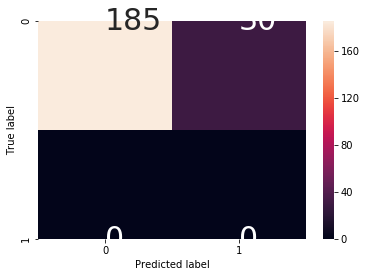

In [56]:
# Wyświetlamy macierz pomyłek oraz wartości metryk
cm = calculate_metrics(model, X_test, y_test)
sns.heatmap(cm, annot=True,annot_kws={"size":30, "ha":'left', "va":'center'}, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
pred = model.predict_proba(X_test)
print(pred.shape)
result = np.c_[pred, tmp_pd_test['zawodnik']]
print(result.shape)
result = result[result[:,0].argsort()]
print(result)
print(y_test)